# 深度学习作业 Deep Learning

欢迎大家! 该作业将帮助我们熟悉机器（深度）学习和神经网络的实践步骤。不用担心没有任何编程经验。我们只需要按照说明进行一步步的操作。

**第一件事: 点击上方文件名, 然后把文件名改成你的名字或用户名.**

如何使用本代码:
* 运行一段代码：单击需要运行的代码，然后点击上方的'运行'(或'Run'). 运行完毕会出现“完成”字样. 第一段代码需要时间可能会稍微长一点
* 注意保持代码运行的我顺序. 如果顺序错乱，代码运行时会出错. 如果需要从头开始, 点击上方 “Kernel” -> “Restart & Clear Output“.
* 如果你中途离开，或窗口长时间闲置, 服务器会见你暂时踢出，重新进入链接即可。如果离开时间较长，服务器会忘记你刚才运行过的内容，你需要从头开始运行一遍. 如果不清楚自己运行到哪一步了，最好按照上面方法重新开始.
* 如何加一段新的代码：点击上方 "+" 按钮.
* 大部分代码 (最重要的部分) 都很简单. 每一段代码有详细的解释. 比较复杂的部分都是用来画图的，不需要理解.
* 如果不知道代码怎么写，请看“作业代码提示“文件。

## 初始

让我们开始吧. 首先我们要带入一些函数库. 最重要的是 tensorflow 和 keras. 这两个是神经网络的主要工具. 

现在我们运行下一段代码. 如果你看到tensorflow的版本号 (2.9.1), 就说明一切正常.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import itertools
zhfont = FontProperties(fname='./SimHei-windows.ttf')
#This is just an example comment
print(tf.__version__)

2022-06-17 10:06:31.571030: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-17 10:06:31.571078: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.9.1


## 加载和检查数据

我们现在加载数据. 我们用的数据叫fashion_mnist, 里面包含一个时尚杂志上的衣服照片. 这些照片被压缩到28x28像素. 这个数据常被用在机器学习的教程里. 你可以在这里看到更多关于这个数据的信息 [here](https://www.kaggle.com/zalando-research/fashionmnist). 

第一行指向数据, 第二行载入数据. 数据有4部分. 数据分为train和test两部分. 每部分又包含图片和标注label. 第三行显示train数据集的形状. 结果应该是 (60000,28,28), 意思是一共又 60,000 张图片，每个图片由 28 x 28 个像素组成.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = fashion_mnist.load_data()
mnist_train_images.shape

4422102/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)



好的，下面就是我们的第一个任务了. 在下面创建一段新的代码，找出 **test** 数据集里有多少张图片.

### <span style="color:red">__第一题:__</span> test集里面有多少张图片?


---
我们看一下第一张图. 程序员一般从0开始索引, 所以 `mnist_train_images[0]` 指的是train集里面的第一张图片. 每个像素是一个数字(0到255), 这个数字表示这个像素的深浅程度 (图片本身没有颜色, 以下我们将用不同颜色显示图片以方便我们辨识).

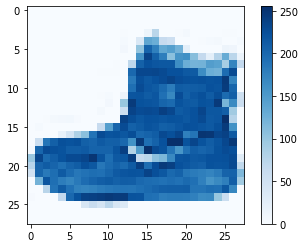

In [3]:
plt.figure()
plt.imshow(mnist_train_images[0],cmap='Blues')
plt.colorbar()
plt.grid(False)

现在我们看看第一张图片的label是什么?

In [4]:
mnist_train_labels[0]

9

---
额...是9. 看着像靴子, 但是我们的label是个数字. 原因是我们载入的数据 **没有** 文字label, 只用不同数字表示不同的衣服类别. 所以, 我们需要手动加入文字label.

In [5]:
class_names = ['T恤', '裤子', '套衫', '裙子', '大衣', 
               '拖鞋', '衬衫', '球鞋', '包', '靴子']
print("完成")

完成


现在我们看到train集里第一张图片的label (第0张)

In [6]:
class_names[mnist_train_labels[0]]

'靴子'

---
现在该你了

### <span style="color:red">__第二题:__</span> train集里面第二张图片的标注(label)是什么?

## 数据清理
清理数据通常是一个很大的工程. 我们这次用的数据已经是清理好的, 我们只需要一个简单的步骤.

首先我们要把像素的深浅度从0到255改成0到1 (不是必须的, 但可以提升训练的速度). 下面的代码把像素深浅度除以255.

In [7]:
mnist_train_images = mnist_train_images / 255.0
mnist_test_images = mnist_test_images / 255.0
print("完成, 注意只运行一次")

完成, 注意只运行一次


---
我们再展示以下第一张图片

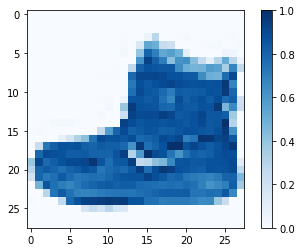

In [8]:
plt.figure()
plt.imshow(mnist_train_images[0],cmap='Blues')
plt.colorbar()
plt.grid(False)

好了! 可以看到深浅度现在又0到1来表示 (图像右边). 现在我们看一下train集里面的前49张图片. 不用试图理解下面的代码. 注意 _最后两行_ , 我们把`mnist_train_labels`里面的标注label和`mnist_train_images`的图片一起显示. 前49张图片是从0数到48 (从0开始索引).

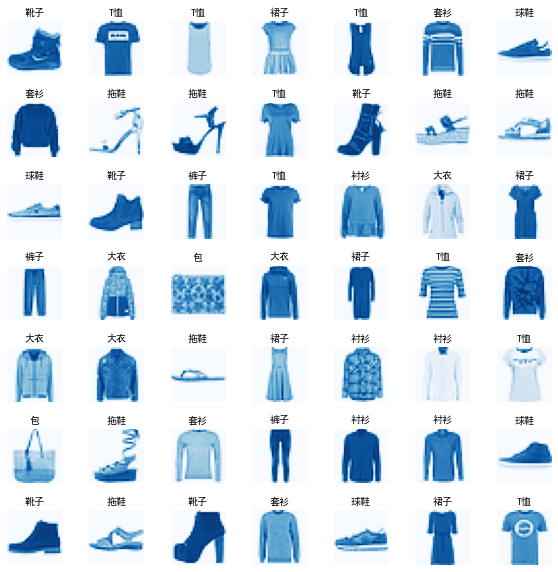

In [9]:
plt.figure(figsize=(10,10))
for i in range(0,49):
    plt.subplot(7,7,i+1)
    plt.subplots_adjust(hspace=0.5)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.grid(False)
    plt.title(class_names[mnist_train_labels[i]],fontproperties=zhfont)
    plt.imshow(mnist_train_images[i], cmap='Blues')



### <span style="color:red">__第三题:__</span> test集第一张图的标注(label)是什么?

现在我们要做神经网络前的最后一步. 如果你还记得课上讲的, 我们需要的不止是train数据集和test数据集. 我们想要尝试多种模型, 所以我们需要把现有的train集再分成两部分. 一部分是新的train集, 一部分用作validation集. 这就是我们在下面两行代码中做的. 第一行把train数据集分成两部分. 80% 留作train, 另20%用作validation. 第二行展示validation集里有多少图片:

In [10]:
our_train_images, our_val_images, our_train_labels, our_val_labels = train_test_split(mnist_train_images, mnist_train_labels, test_size=12000)
our_val_images.shape

(12000, 28, 28)

---
一个简单的问题: 我们将用多少张图片来训练模型? 不需要写代码, 可以手算.

### <span style="color:red">__第四题:__</span> 我们将用多少张图片来训练模型 (新的train集里面有多少张图片)?

## 建造神经网络
终于到神经网络neural networks了! 我们管下面第一个模型叫model1

* 第一行创造了一个新的空的网络,我们需要一层层往里加. 我们的第一个neural network将是非常简单的. 一共两层: 一个input(输入)层, 一个output(输出)层, 没有中间的隐藏层! 
* 第二行加入了input层, 每一个input是由 28x28=784 个数字代表, 每一个数字代表图片里的一个像素. 
* 第三行加入了output层, 每一个output由10个数字组成, 分别是每一个衣服种类的概率. 哪个衣服种类的概率最大, 模型就会判断这个图片是哪类衣服.
* 第四行是设置训练的一些细节, 包括loss function,和 optimizer. 不需理解这部分.
* 倒数第二行显示模型的总结. 这就是我们运行下面一段代码后会看到的.

In [11]:
model1 = keras.Sequential()
model1.add (keras.layers.Flatten(input_shape=(28, 28)))
model1.add (keras.layers.Dense(10,activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


2022-06-17 10:09:29.138310: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-17 10:09:29.138360: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-17 10:09:29.138383: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-31-20-24): /proc/driver/nvidia/version does not exist
2022-06-17 10:09:29.138620: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 训练神经网络

现在我们要让我们的神经网络自己学习. 这通常是最耗时的一部分. 我们的模型比较简单, 所以会比较快, 但是比较复杂的模型会花很长时间. 我们只需要向电脑指出用什么数据训练, 还有训练多长时间. 一个"epoch"指的是走过所有数据一遍的时间. 但是我们一般要训练更长些. 对于这个模型来讲5个epochs就够了. *(注意accuracy(准确率)会从10%左右开始. 在训练中会上涨. 还需要注意的是, 如果你再重新运行一遍下面的代码, 模型将从上回停止的地方继续训练, 所以连续运行两次就相当与10个epoch. 所以在最后提交的版本中, 注意只运行一遍*)

In [12]:
model1.fit(our_train_images, our_train_labels, epochs=5)
print("完成")

Epoch 1/5
1500/1500 [==============================] - 3s 1ms/step - loss: 0.6279 - accuracy: 0.7902
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4742 - accuracy: 0.8387
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4443 - accuracy: 0.8475
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4293 - accuracy: 0.8518
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4186 - accuracy: 0.8560
完成


## 结果评估
我们可以看到上面的accuracy(准确率). Accuracy是指模型准确认出了多少%的图片. 但这只是在 **train** 集里的准确率. 我们需要看他在 **validation** 集里它的表现. 下面, 我们在validation集上 *评估* 模型的表现 (第一行), 然后展示它的准确率 (第二行).

In [13]:
val_loss1, val_acc1 = model1.evaluate(our_val_images, our_val_labels)
print('Validation 准确率:', val_acc1)

375/375 [==============================] - 1s 1ms/step - loss: 0.4321 - accuracy: 0.8467
Validation 准确率: 0.846666693687439


### <span style="color:red">__第五题:__</span> model1在train集上的准确率是多少?

### <span style="color:red">__第六题:__</span> model1在validation集上的准确率是多少?

## 尝试其他模型
这么简单的一个模型能达到80%以上的准确率相当不错了! 这意味着我们的程序已经能在大部分时间准确的认出图片里是什么衣服了. 下面我们看看还能不能做的更好. 我们先加入一个隐藏层. 我们需要从头建一个新的神经网络, 我们管它叫`model2`. 跟model1的区别是, 我们加了一个带有128个神经元的隐藏层.

In [14]:
model2 = keras.Sequential()
model2.add (keras.layers.Flatten(input_shape=(28, 28)))
model2.add (keras.layers.Dense(128,activation='sigmoid'))
model2.add (keras.layers.Dense(10,activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


---
让我们训练30个epochs.

In [15]:
model2.fit(our_train_images, our_train_labels, epochs=30)
print("完成")

Epoch 1/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5740 - accuracy: 0.8065
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4075 - accuracy: 0.8534
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3689 - accuracy: 0.8664
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3437 - accuracy: 0.8750
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3246 - accuracy: 0.8820
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3093 - accuracy: 0.8882
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2954 - accuracy: 0.8928
Epoch 8/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2824 - accuracy: 0.8971
Epoch 9/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2717 - accuracy: 0.9007
Epoch 10/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.262

答题时间. 
### <span style="color:red">__第七题:__</span> model2在train集上的准确率是多少?
### <span style="color:red">__第八题:__</span> model2在validation集上的准确率是多少?

### <span style="color:red">__第九题:__</span> 为什么model2在train集上和在validation集上的准确率不一样? 这会不会是一个问题? 请用100字以内解答.

---
第二个模型的准确率不错, 但是我们还可以通过深度学习来提高. 在第三个模型中, 我们将用三个隐藏层, 并使用dropout. (dropout 是一个可以减少过度拟合overfitting 的技巧)


In [ ]:
model3 = keras.Sequential()
model3.add (keras.layers.Flatten(input_shape=(28, 28)))
model3.add (keras.layers.Dense(64,activation='sigmoid'))
model3.add(keras.layers.Dropout(rate=0.1))
model3.add (keras.layers.Dense(64,activation='sigmoid'))
model3.add(keras.layers.Dropout(rate=0.1))
model3.add (keras.layers.Dense(64,activation='sigmoid'))
model3.add(keras.layers.Dropout(0.1))
model3.add (keras.layers.Dense(10,activation='softmax'))
model3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model3.summary()

-----
这次我们运行40个epoch.

In [ ]:
model3.fit(our_train_images, our_train_labels, epochs=40)
print("完成")

### <span style="color:red">__第十题:__</span> model3在train集上的准确率是多少?
### <span style="color:red">__第十一题:__</span> model3在validation集上的准确率是多少?

到了做选择的时间了. 如果你需要在三个模型中选取一个, 在实际应用中使用, 你会选择哪一个? 

### <span style="color:red">__第十二题:__</span> 面对新的未知的数据, 你将选择使用哪一个模型? 为什么?

请在下面的代码中选择你的模型. 

**重要的事情说三遍!!!** **重要的事情说三遍!!!** **重要的事情说三遍!!!**
请把下面的 `modelx` 改成 `model1`, `model2`, 或 `model3` 中你选择的那一个, 否则下面的运行将会出错误, 因为电脑不知道 `modelx` 是什么东西.

In [ ]:
final_model=modelx
print("完成")

## 检查最终表现
现在我们已经选好了模型, 是时候用test数据集来检查它的表现了. 模型在test集上表现的准确率, 就是它在实际应用中会展现的准确率了. 注意在这一步之前, 我们不能使用test集, 因为那样影响我们模型的选择, 模型在test上的表现也就不中立了. 下面一段代码检测了模型在test集上的准确率, 并将它储存.

In [ ]:
test_loss, test_acc = final_model.evaluate(mnist_test_images, mnist_test_labels)
predicted_classes = np.argmax(final_model.predict(mnist_test_images), axis=-1)
predictions = final_model.predict(mnist_test_images)
print('Test准确率:', test_acc)

### <span style="color:red">__第十三题:__</span> 你选择的模型在test集上的准确率是多少?

---
下面我们统计一共判断对了多少次,错了多少次. 这些数字应该和上面的准确率相契合.

In [ ]:
correct = np.nonzero(predicted_classes==mnist_test_labels)[0]
incorrect = np.nonzero(predicted_classes!=mnist_test_labels)[0]
print("算法判断正确次数:",correct.shape[0])
print("算法判断错误次数:",incorrect.shape[0])

---
现在我们展示前25个正确的判断. 我们在这里用 **红色** 来显示.

In [ ]:
plt.figure(figsize=(15,15))
for i in range(0,49):
    plt.subplot(7,7,i+1)
    plt.subplots_adjust(hspace=0.5)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.grid(False)
    plt.title('正确:'+class_names[mnist_test_labels[correct[i]]]+'\n 算法:'+class_names[predicted_classes[correct[i]]], fontproperties=zhfont)
    plt.imshow(mnist_test_images[correct[i]], cmap='Reds')

---
再展示前25个错误的判断. 我们在这里用 **绿色** 来显示.

In [ ]:
plt.figure(figsize=(15,15))
for i in range(0,49):
    plt.subplot(7,7,i+1)
    plt.subplots_adjust(hspace=0.5)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.grid(False)
    plt.title('正确:'+class_names[mnist_test_labels[incorrect[i]]]+'\n 算法:'+class_names[predicted_classes[incorrect[i]]],fontproperties=zhfont)
    plt.imshow(mnist_test_images[incorrect[i]], cmap='Greens')


---
我们具体看一下第一个错误的判断. 下面的代码展示了我们的算法认为这张图片是每一个衣服种类的概率.

In [ ]:
index = 0
print('正确答案为 '+class_names[mnist_test_labels[incorrect[index]]])
print('算法预测此图为:')
for i in range(10):
    print("{:06.2%}".format(predictions[incorrect[index]][i])+': '+class_names[i]+'')


----
结束了! 最后一件 **重要** 的事, 下载你完成的代码. 点击上方 "文件", 然后 下载, 选择 .ipynb 格式. 
